<a href="https://colab.research.google.com/github/iamhero2709/Learning-Projects-Notebook/blob/main/ml_projects/linear_SVM_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

LINEAR SVM FROM SCARTCH
---
* SUPPORT VECTOR MACHINE
* OBJECTIVE -FIIND THE OPTIMAL  HYPERPLANE THAT MAXIMIZES THAT MARGIN  BETWEEN CLASSES
* SUPPORT VECTOR - THE DATA POINT CLOSET TO THE HYPERPLANE THAT "SUPPORT " IT
* KERNEL TRICK - ALLOW SVMS TO HANDLE NON-LINEARITY SEPERABLE DATA
* HINGE LOSS-THE LOSS FUNCTION USED IN SVMS
* REGULARIZATION -BALANCES MARGIN MAIMIZATION AND CLASSSIFICATION ERROR

Implement a Basic Linear SVM
---

In [1]:
import numpy as np


In [22]:
import numpy as np

class LinearSVM:
    def __init__(self, lr=0.001, C=1.0, n_iters=1000):
        self.lr = lr          # learning rate
        self.C = C            # regularization (trade-off)
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = [] # Initialize the losses list

    def fit(self, X, y):
        n_samples, n_features = X.shape
        # initialize weights aur bias
        self.w = np.zeros(n_features)
        self.b = 0
        # labels ko convert karo -1 ya +1 mein
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            loss = 0 # Initialize loss for the current iteration
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    # sahi classification aur margin ke bahar
                    dw = 2 * self.w        # gradient of regularization
                    db = 0
                else:
                    # galat ya margin ke andar
                    dw = 2 * self.w - np.dot(x_i, y_[idx])
                    db = -y_[idx]
                    loss += 1 - y_[idx] * (np.dot(x_i, self.w) + self.b)
                # parameters update karo
                self.w -= self.lr * dw
                self.b -= self.lr * db
            # total loss for the iteration
            self.losses.append((0.5 * np.dot(self.w, self.w)) + self.C * loss)

    def predict(self, X):
        approx = np.dot(X, self.w) + self.b
        return np.sign(approx)

In [23]:
import matplotlib.pyplot as plt

def plot_loss(svm_model):
    plt.plot(range(len(svm_model.losses)), svm_model.losses, color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Loss vs Epochs")
    plt.grid(True)
    plt.show()


In [24]:
def plot_decision_boundary(X, y, svm_model):
    plt.figure(figsize=(8, 6))
    # Points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')

    # Boundary line
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # Grid
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = svm_model.predict(grid).reshape(xx.shape)

    # Contour
    plt.contourf(xx, yy, Z, levels=[-1, 0, 1], alpha=0.2, colors=["blue", "grey", "red"])
    plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='black')
    plt.title("Decision Boundary")
    plt.show()



Training with C=0.01, lr=0.0001
Accuracy: 1.00


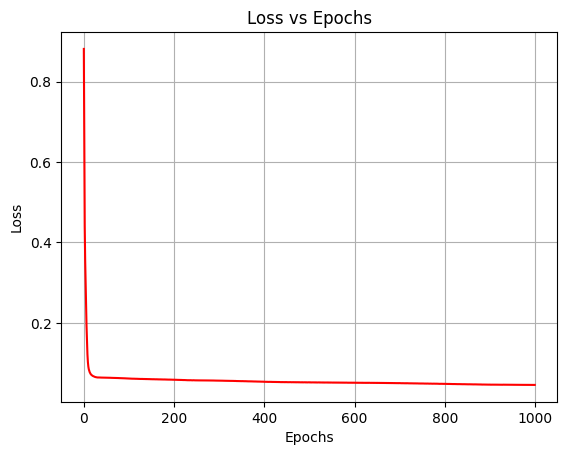

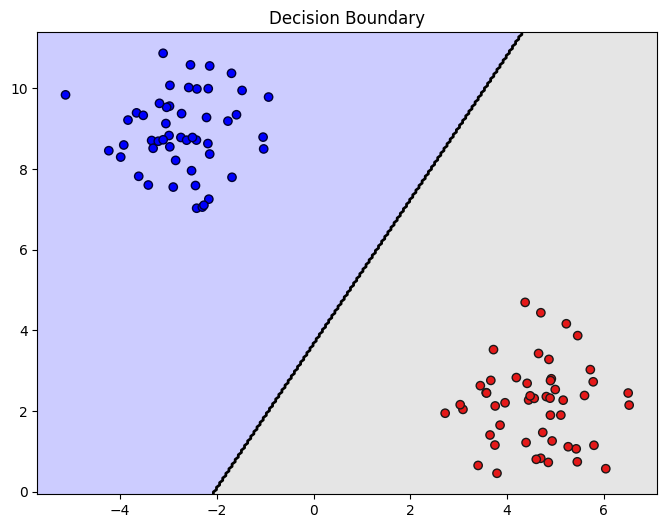


Training with C=0.01, lr=0.001
Accuracy: 1.00


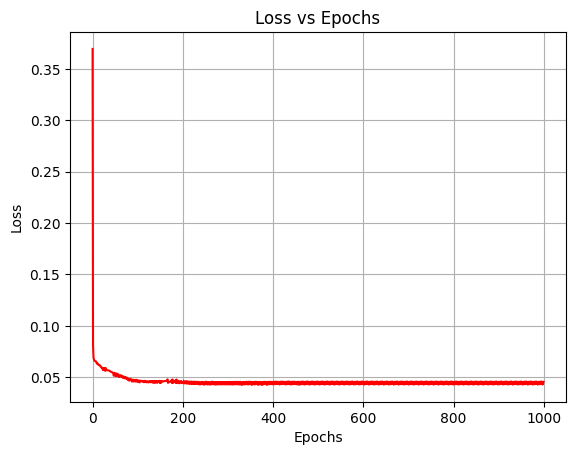

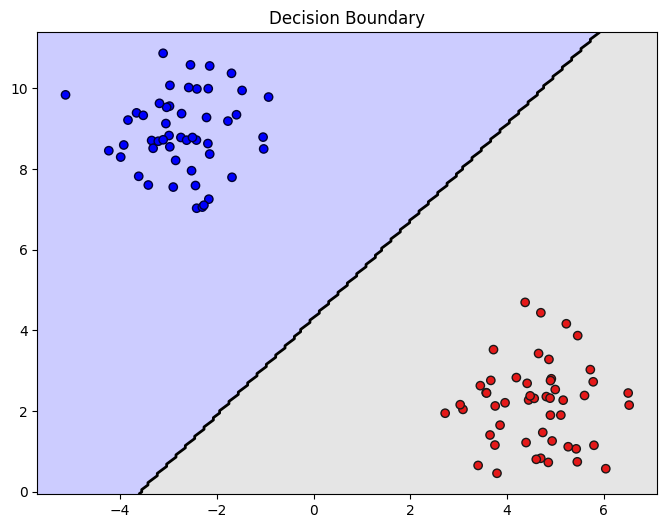


Training with C=0.01, lr=0.01
Accuracy: 1.00


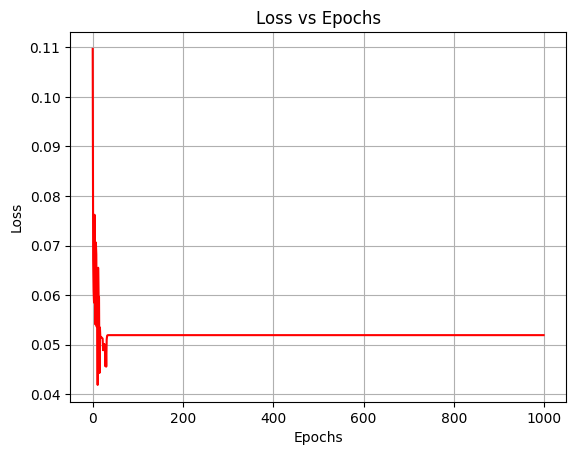

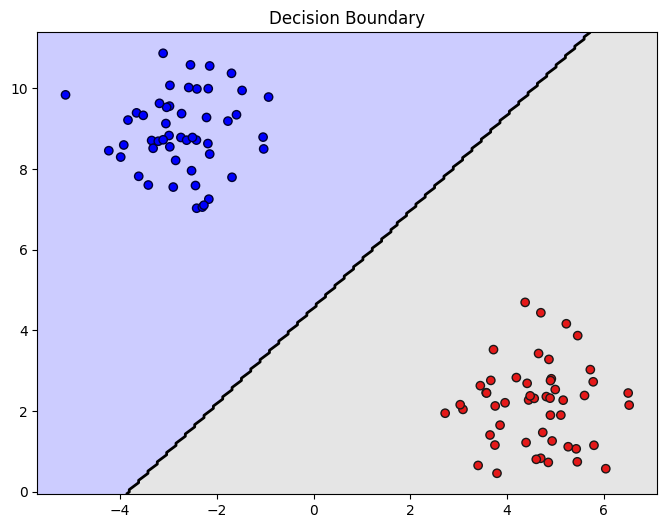


Training with C=0.1, lr=0.0001
Accuracy: 1.00


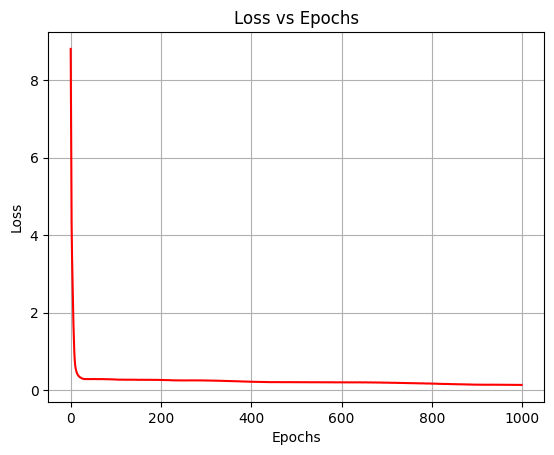

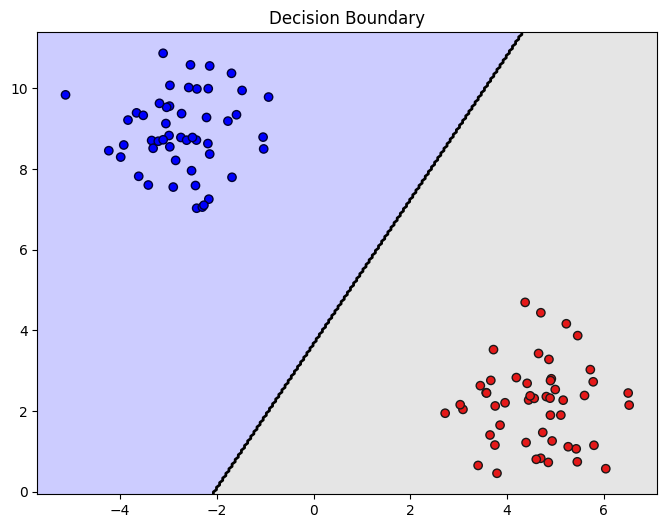


Training with C=0.1, lr=0.001
Accuracy: 1.00


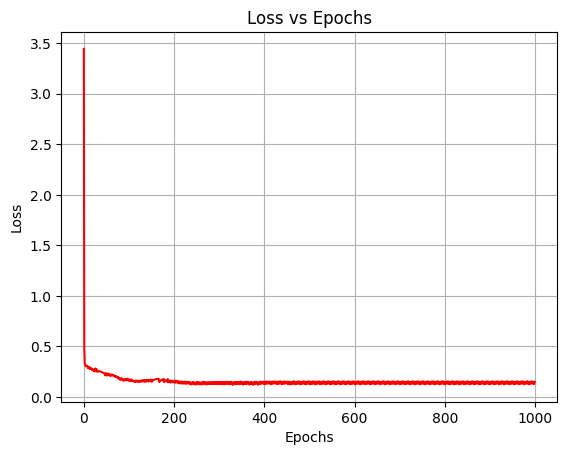

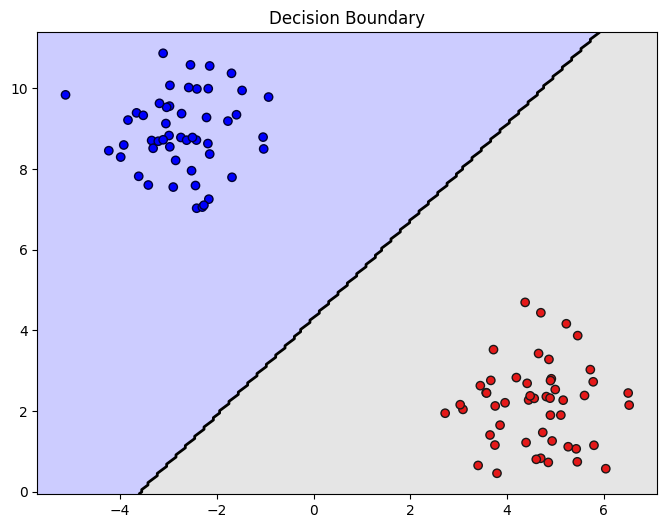


Training with C=0.1, lr=0.01
Accuracy: 1.00


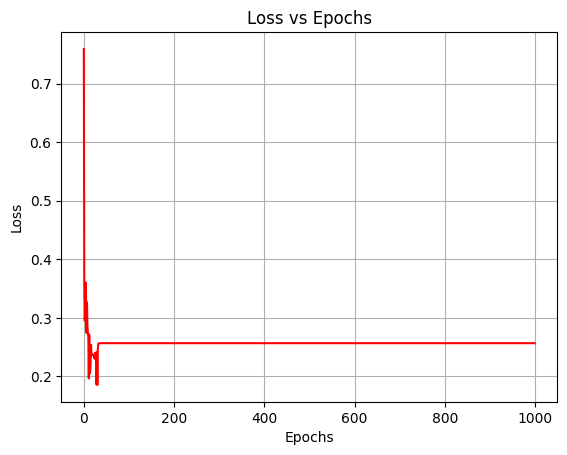

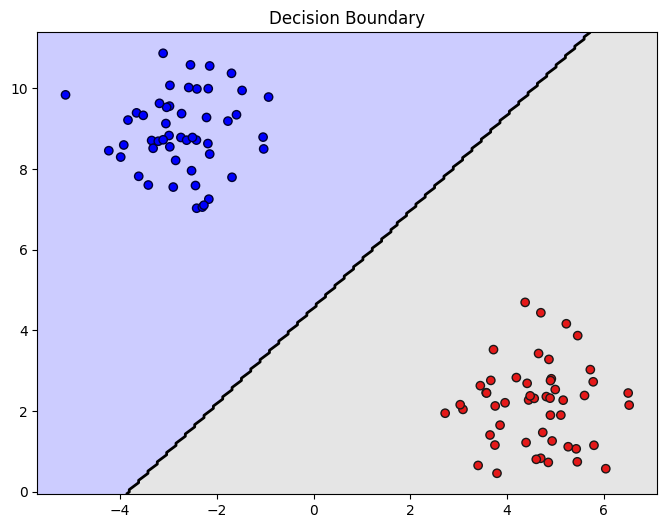


Training with C=1, lr=0.0001
Accuracy: 1.00


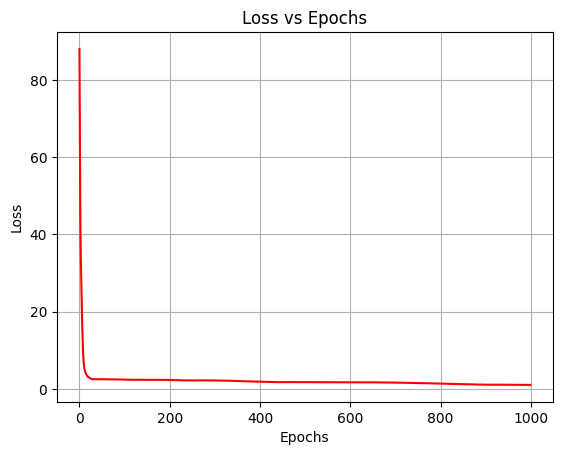

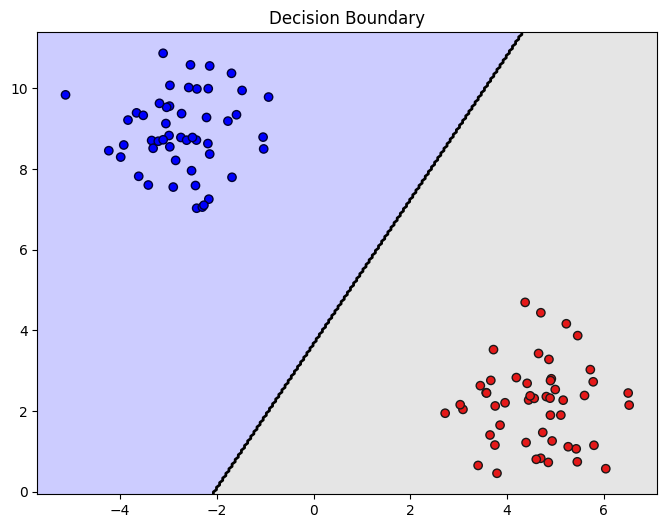


Training with C=1, lr=0.001
Accuracy: 1.00


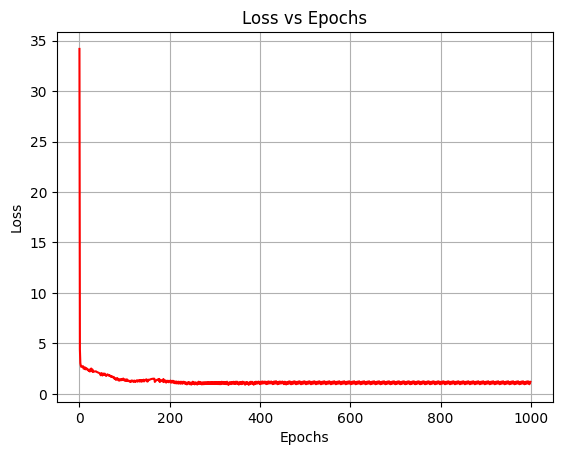

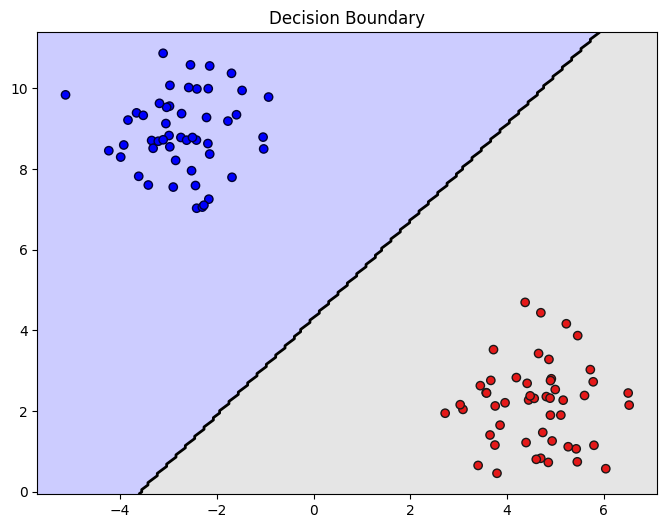


Training with C=1, lr=0.01
Accuracy: 1.00


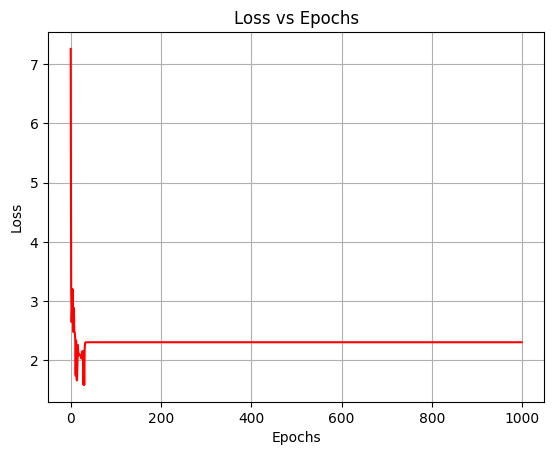

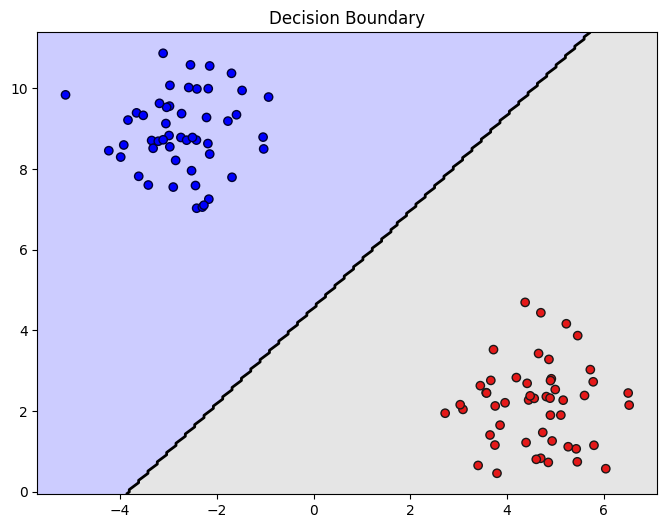


Training with C=10, lr=0.0001
Accuracy: 1.00


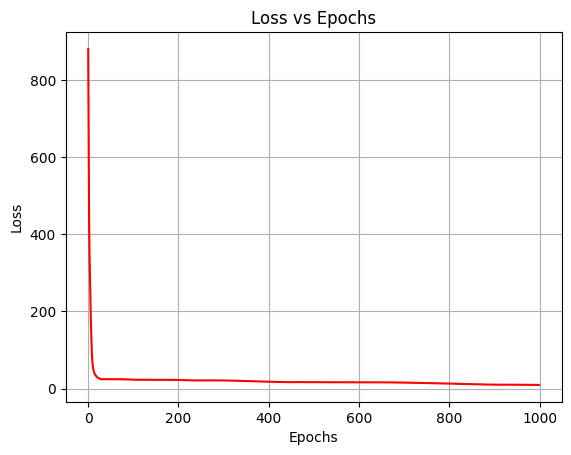

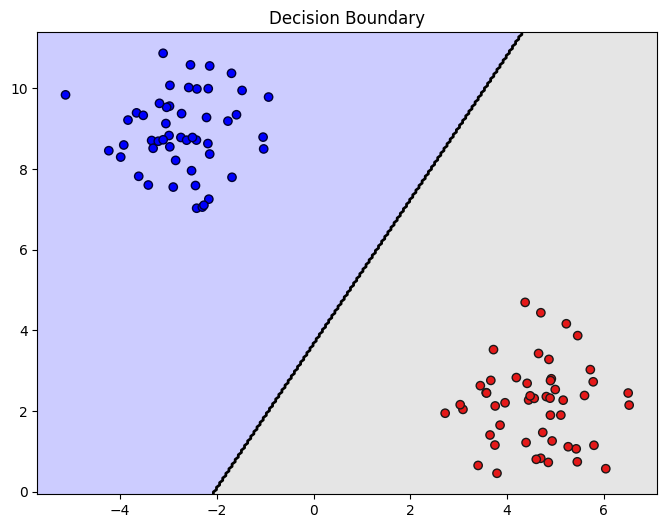


Training with C=10, lr=0.001
Accuracy: 1.00


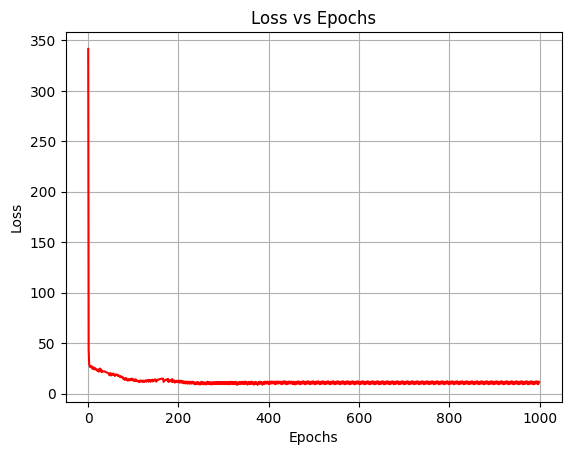

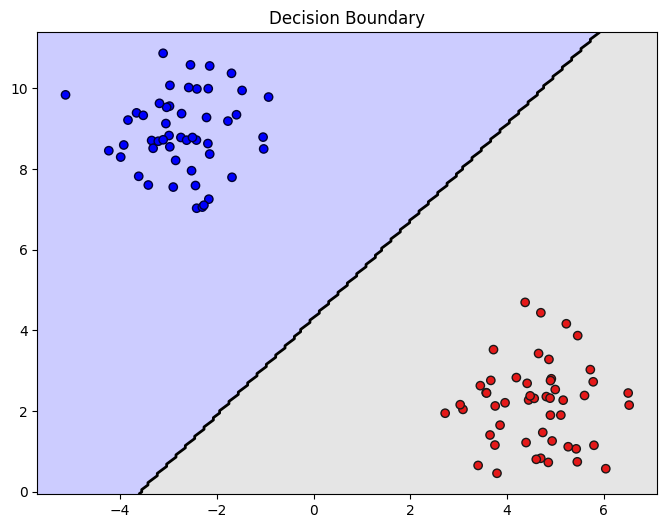


Training with C=10, lr=0.01
Accuracy: 1.00


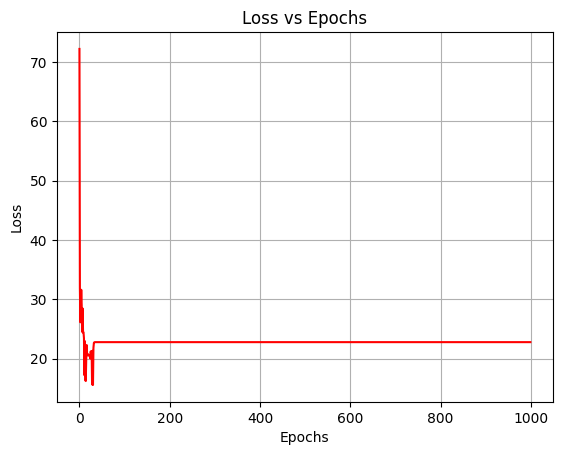

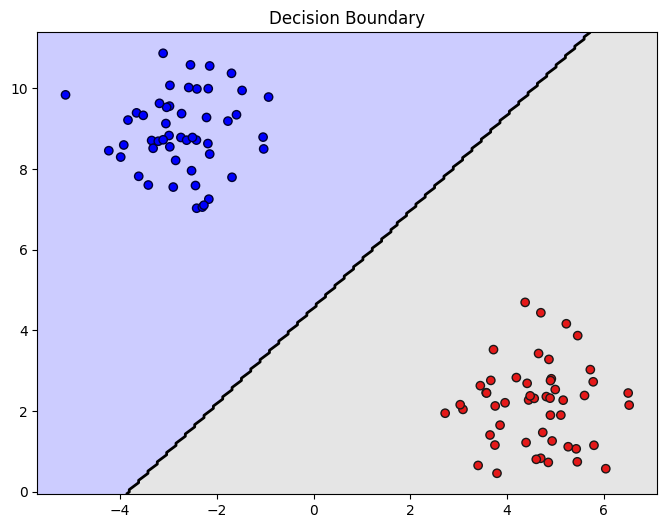

In [25]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, centers=2, random_state=42)
y = np.where(y == 0, -1, 1)

# Try different values
for C in [0.01, 0.1, 1, 10]:
    for lr in [0.0001, 0.001, 0.01]:
        print(f"\nTraining with C={C}, lr={lr}")
        svm = LinearSVM(lr=lr, C=C, n_iters=1000)
        svm.fit(X, y)
        acc = np.mean(svm.predict(X) == y)
        print(f"Accuracy: {acc:.2f}")
        plot_loss(svm)
        plot_decision_boundary(X, y, svm)


In [26]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X = data.data
y = data.target  # 0 and 1

# Convert to -1 and +1 for SVM
y = np.where(y == 0, -1, 1)

# Normalize/standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [27]:
svm = LinearSVM(lr=0.001, C=1.0, n_iters=1000)
svm.fit(X_train, y_train)

# Evaluate
train_acc = np.mean(svm.predict(X_train) == y_train)
test_acc = np.mean(svm.predict(X_test) == y_test)

print("Train Accuracy:", train_acc)
print("Test Accuracy :", test_acc)


Train Accuracy: 0.9362637362637363
Test Accuracy : 0.956140350877193


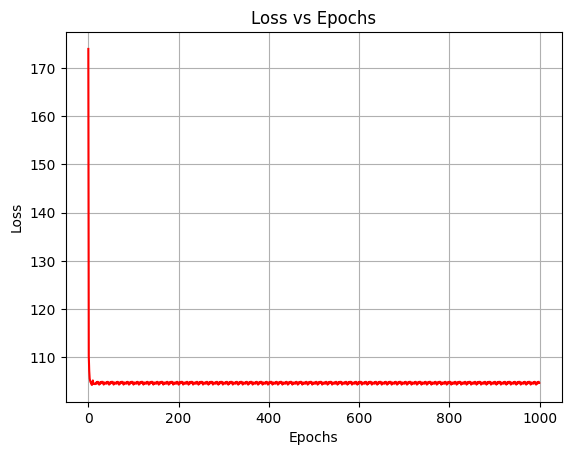

In [28]:
plot_loss(svm)


In [ ]:
# may be data is overfiiting



Training: C=0.001, lr=0.0001
Train Accuracy: 0.9407
Test Accuracy : 0.9561

Training: C=0.001, lr=0.001
Train Accuracy: 0.9363
Test Accuracy : 0.9561

Training: C=0.001, lr=0.01
Train Accuracy: 0.9385
Test Accuracy : 0.9649

Training: C=0.01, lr=0.0001
Train Accuracy: 0.9407
Test Accuracy : 0.9561

Training: C=0.01, lr=0.001
Train Accuracy: 0.9363
Test Accuracy : 0.9561

Training: C=0.01, lr=0.01
Train Accuracy: 0.9385
Test Accuracy : 0.9649

Training: C=0.1, lr=0.0001
Train Accuracy: 0.9407
Test Accuracy : 0.9561

Training: C=0.1, lr=0.001
Train Accuracy: 0.9363
Test Accuracy : 0.9561

Training: C=0.1, lr=0.01
Train Accuracy: 0.9385
Test Accuracy : 0.9649

Training: C=1, lr=0.0001
Train Accuracy: 0.9407
Test Accuracy : 0.9561

Training: C=1, lr=0.001
Train Accuracy: 0.9363
Test Accuracy : 0.9561

Training: C=1, lr=0.01
Train Accuracy: 0.9385
Test Accuracy : 0.9649

Training: C=10, lr=0.0001
Train Accuracy: 0.9407
Test Accuracy : 0.9561

Training: C=10, lr=0.001
Train Accuracy: 0.9363

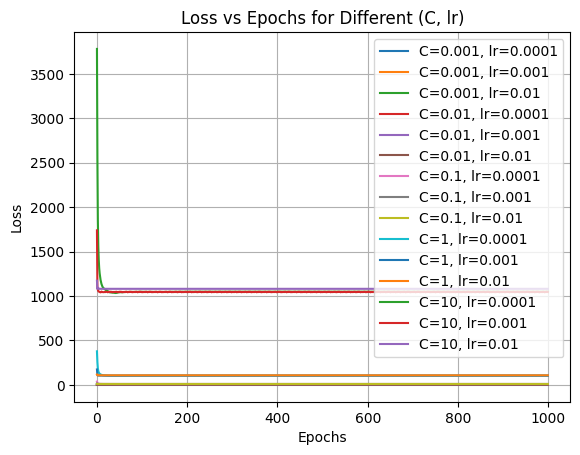

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----- LINEAR SVM CLASS -----
class LinearSVM:
    def __init__(self, lr=0.001, C=1.0, n_iters=1000):
        self.lr = lr
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)

        for _ in range(self.n_iters):
            loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    dw = 2 * self.w
                    db = 0
                else:
                    dw = 2 * self.w - y_[idx] * x_i
                    db = -y_[idx]
                    loss += 1 - y_[idx] * (np.dot(x_i, self.w) + self.b)
                self.w -= self.lr * dw
                self.b -= self.lr * db
            self.losses.append((0.5 * np.dot(self.w, self.w)) + self.C * loss)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# ----- LOSS PLOT FUNCTION -----
def plot_loss(svm_model, label):
    plt.plot(svm_model.losses, label=label)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.legend()

# ----- DATA LOAD -----
data = load_breast_cancer()
X, y = data.data, data.target
y = np.where(y == 0, -1, 1)

# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# ----- TUNING MULTIPLE COMBINATIONS -----
C_values = [0.001, 0.01, 0.1, 1, 10]
lr_values = [0.0001, 0.001, 0.01]

for C in C_values:
    for lr in lr_values:
        print(f"\nTraining: C={C}, lr={lr}")
        svm = LinearSVM(lr=lr, C=C, n_iters=1000)
        svm.fit(X_train, y_train)

        # Predict
        train_acc = np.mean(svm.predict(X_train) == y_train)
        test_acc = np.mean(svm.predict(X_test) == y_test)

        print(f"Train Accuracy: {train_acc:.4f}")
        print(f"Test Accuracy : {test_acc:.4f}")

        # Plot loss
        plot_loss(svm, label=f"C={C}, lr={lr}")

plt.title("Loss vs Epochs for Different (C, lr)")
plt.show()


🎯 Goal:
---
* Generate circular (non-linear) data

* Train scratch linear SVM

* Accuracy check karein

* Loss plot karein → dekhein SVM fail kyun ho raha hai



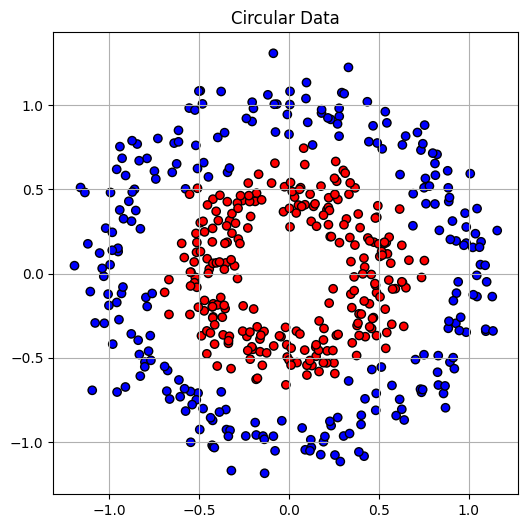


Train Accuracy: 0.5175
Test Accuracy : 0.4300


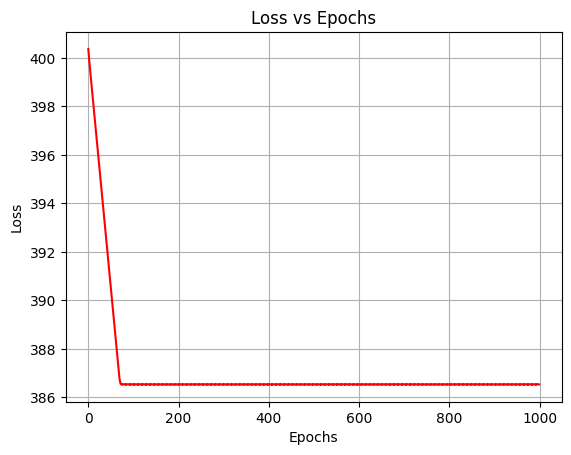

In [33]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ----- LINEAR SVM CLASS (Same as before) -----
class LinearSVM:
    def __init__(self, lr=0.001, C=1.0, n_iters=1000): # paramter for linear svm liker learning c for regularization and no of iternations
        self.lr = lr
        self.C = C
        self.n_iters = n_iters
        self.w = None
        self.b = None
        self.losses = []

    def fit(self, X, y):  # fit data into linear svm function
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        y_ = np.where(y <= 0, -1, 1)  # converting into labelss y belongs to y -1 to 1

        for _ in range(self.n_iters):
            loss = 0
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) + self.b) >= 1
                if condition:
                    dw = 2 * self.w
                    db = 0
                else:
                    dw = 2 * self.w - y_[idx] * x_i
                    db = -y_[idx]
                    loss += 1 - y_[idx] * (np.dot(x_i, self.w) + self.b)
                self.w -= self.lr * dw
                self.b -= self.lr * db
            self.losses.append((0.5 * np.dot(self.w, self.w)) + self.C * loss)

    def predict(self, X):
        return np.sign(np.dot(X, self.w) + self.b)

# ----- LOSS PLOT FUNCTION -----
def plot_loss(model):
    plt.plot(model.losses, color='red')
    plt.title("Loss vs Epochs")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
    plt.show()

# ----- VISUALIZE DATA FUNCTION -----
def plot_data(X, y, title):
    plt.figure(figsize=(6,6))
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k')
    plt.title(title)
    plt.grid(True)
    plt.show()

# ----- GENERATE CIRCULAR DATA -----
X, y = make_circles(n_samples=500, noise=0.1, factor=0.5, random_state=42)

# Visualize data
plot_data(X, y, "Circular Data")

# Convert labels: 0 → -1, 1 → +1
y = np.where(y == 0, -1, 1)

# Normalize and split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Train linear SVM
svm = LinearSVM(lr=0.001, C=1.0, n_iters=1000)
svm.fit(X_train, y_train)

# Evaluate
train_acc = np.mean(svm.predict(X_train) == y_train)
test_acc = np.mean(svm.predict(X_test) == y_test)

print(f"\nTrain Accuracy: {train_acc:.4f}")
print(f"Test Accuracy : {test_acc:.4f}")

# Loss Plot
plot_loss(svm)


In [ ]:
# outcome linear svm failing on non linear data ---
# solution --- KERNEL SVM AND NON LINEAR TRANSFORMATION